<a href="https://colab.research.google.com/github/KonstantinElfimow/central_limit_theorem/blob/main/central_limit_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Центральная предельная теорема**

Сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые маштабы (ни одно слагаемое не доминирует), имеет распределение, близкое к нормальному

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as st

*Глобальные настройки*

In [4]:
b = 50 # количетсво интервалов разбиений на гистограмме
g = 10000 # количество генерируемых значений случайной величины

In [5]:
def theretical_frequencies(X: np.array):
  m, s = np.mean(X), np.std(X)
  mx, mn = np.max(X), np.min(X)
  x_step = (mx - mn) / b
  ndist = st.NormalDist(mu=m, sigma=s)
  x = [mn + n * x_step for n in range(b)]
  x_means = [i + x_step / 2 for i in x[:-1]]
  p = [ndist.cdf(x[i + 1]) - ndist.cdf(x[i]) for i in range(len(x) - 1)]
  ft = [i * g for i in p]
  return x_means, ft

# *Равномерное распределение*

In [6]:
n = 10

In [7]:
X1 = [np.random.uniform(size=n).mean() for _ in range(g)]
x_means, ft = theretical_frequencies(X1) 

Строим эмпирическое и теоретическое распределения

Text(0, 0.5, 'Частота')

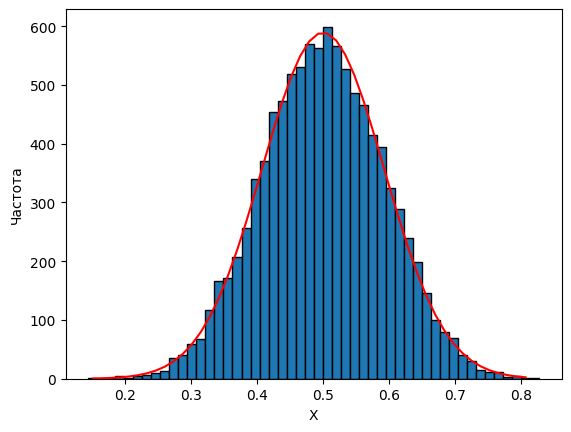

In [8]:
plt.hist(X1, edgecolor='black', bins=b)
plt.plot(x_means, ft, color='red')
plt.xlabel('X')
plt.ylabel('Частота')

## *Равномерное распределение с преобладающим значением*

In [9]:
n = 10

In [10]:
X2 = [np.concatenate([np.random.uniform(size=n - 1),
                      np.random.uniform(size=1) * n]).mean() for _ in range(g)]
x_means, ft = theretical_frequencies(X2)

Строим эмпирическое и теоретическое распределения

Text(0, 0.5, 'Частота')

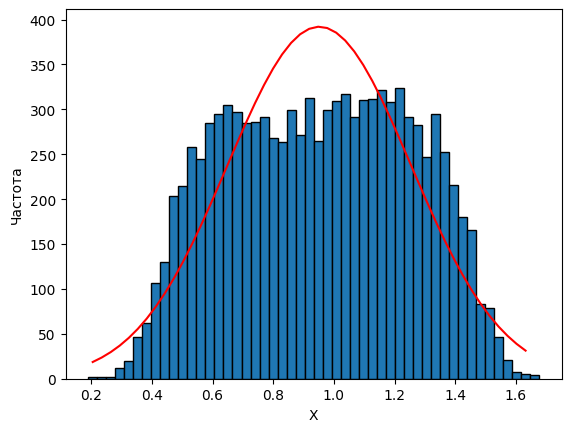

In [11]:
plt.hist(X2, edgecolor='black', bins=b)
plt.plot(x_means, ft, color='red')
plt.xlabel('X')
plt.ylabel('Частота')

In [12]:
# Как можно увидеть, распределение всё ещё близко к равномерному.
# ЦПТ не будет работать в случаях, когда хотя бы одно слагаемое доминирует.

# *Экспоненциальное распределение*

In [20]:
n = 10

In [21]:
X3 = [np.random.exponential(2.5, size=n).mean() for _ in range(g)]
x_means, ft = theretical_frequencies(X3)

Строим эмпирическое и теоретическое распределения

Text(0, 0.5, 'Частота')

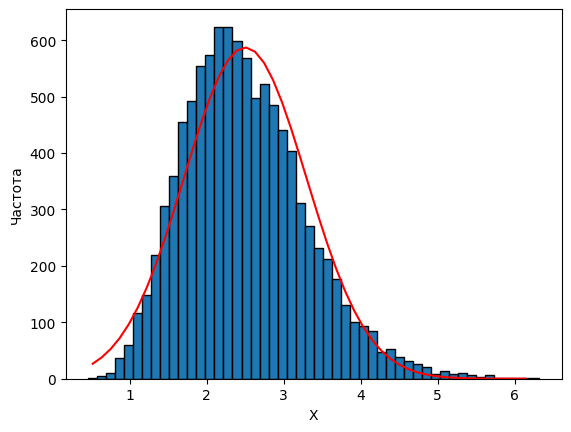

In [22]:
plt.hist(X3, edgecolor='black', bins=b)
plt.plot(x_means, ft, color='red')
plt.xlabel('X')
plt.ylabel('Частота')

In [23]:
# При увеличении величины n ассиметрия на графике будет всё менее замента.
# Но ЦПТ по-прежднему работаем. Просто нужно присваивать большие n.